# Deep Learning: Ex.2 - Back Propagation


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [ ]:
def sigmoid(z): # g(z)
    return 1/(1+np.exp(-z))

def d_sigmoid (z): # g'(z)
    g = 1/(1+np.exp(-z))
    return g*(1-g)

def loss(y,yhat): # softmax loss
    eps = 1e-10  # just to avoid the log(0) warning
    L = y*np.log(yhat+eps) + (1-y)*np.log(1-yhat+eps)
    return -L

### 1. Multilayer Perceptron (MLP)

Implement the gradient descent algorithm as presented in class:

In [ ]:
def gradient_descent(X, Y, W1, W2, T=100, alpha=0.1):
    J = np.zeros(T)
    n = 400
    for t in range(T): # epochs loop
        
        total_loss = 0
        for xi,yi in zip(X,Y):  # samples loop (pick a single sample at a time)
            
            xi = xi.reshape(1,-1)  # convert 'vector' to 'row': (d,) -> (1,d)
           
            # 1. forward_propagation: a0=x -> z1 -> a1 -> z2 -> a2 -> yhat=a2
            a0 = xi
            z1 = np.dot(a0,W1)
            a1 = sigmoid(z1)
            z2 = np.dot(a1,W2)
            yhat = sigmoid(z2)
            
            # 2. back progation: delta2 -> delta1
            delta2 = yhat - yi
            delta1 = np.dot(delta2, W2.T)*d_sigmoid(z1)
            
            # 3. calc gradients: dJ_dW1, dJ_dW2
            dJ_dW1 = a0.T * delta1
            dJ_dW2 = a1.T * delta2

            # 4. update weights: W1 -= alpha*dJ_dW1, W2 -= alpha*dJ_dW2
            W1 -= alpha*dJ_dW1
            W2 -= alpha*dJ_dW2
            
        # finally, calc total loss J[t] (sum loss over all samples)
            loss_i = loss(yhat,yi)
            total_loss += loss_i

        J[t] = total_loss
        
    return J, W1, W2

### 2. Test your code

1. prepare the training dataset
2. init weights randomly 
3. train the network
4. visualize the results

(you can play with the parameters if needed.)

X.shape = (400, 3)
Y.shape = (400, 1)


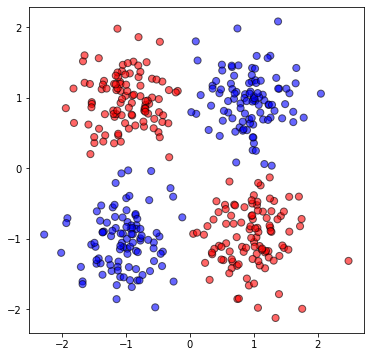

In [ ]:
# 1. prepare the training dataset

def generate_dataset():
    centers = [[-1,1],[1, 1], [-1, -1], [1, -1]]
    X, _ = datasets.make_blobs(n_samples=400, centers=centers, cluster_std=0.4)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) + 0
    Y = Y[:,None]
    X = np.c_[np.ones(X.shape[0]),X] # add 'ones' column to X
    return X,Y

X,Y = generate_dataset()

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

plt.figure(figsize=(6,6))
plt.scatter(X[:,1],X[:,2],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.show()

In [ ]:
# 2. Init weights randomly 

W1 = np.random.randn(3,6)*0.01
W2 = np.random.randn(6,1)*0.01

print('W1.shape =',W1.shape)
print('W2.shape =',W2.shape)


W1.shape = (3, 6)
W2.shape = (6, 1)


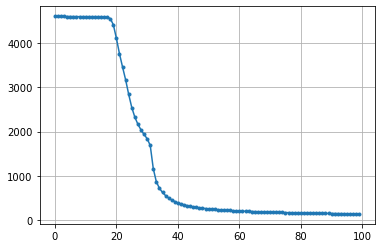

In [ ]:
# 3. Train the network 

J, W1, W2 = gradient_descent(X,Y,W1, W2, T=100, alpha=0.1)
plt.plot(J,'.-')
plt.grid()

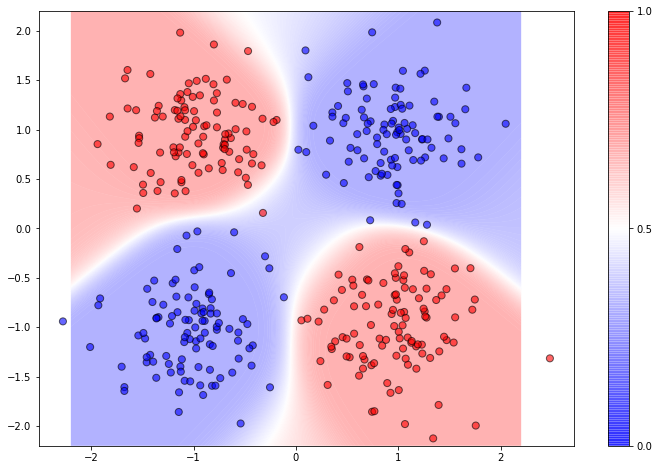

In [ ]:
# 4. Visualize the results

nn = 100
x1_set = np.linspace(-2.2,2.2,nn)
x2_set = np.linspace(-2.2,2.2,nn)

X1,X2 = np.meshgrid(x1_set,x2_set)
xx = np.c_[np.ones(nn*nn),X1.flatten(),X2.flatten()]

# forward propagation
a0 = xx
z1 = a0.dot(W1)  
a1 = sigmoid(z1)
z2 = a1.dot(W2)
a2 = sigmoid(z2)
yy_hat = a2

G_grid = yy_hat.reshape(nn,nn)

plt.figure(figsize=(12,8))
plt.contourf(x1_set,x2_set,G_grid, 100,alpha=0.3, cmap=plt.cm.bwr,antialiased=True,vmin=0,vmax=1)
plt.scatter(X[:,1],X[:,2],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.colorbar(ticks=[ 0,0.5, 1])
plt.show()

### 3. Try a different dataset

Repeat the same steps as before.

(you can play with the parameters if needed.)

X.shape = (200, 3)
Y.shape = (200, 3)


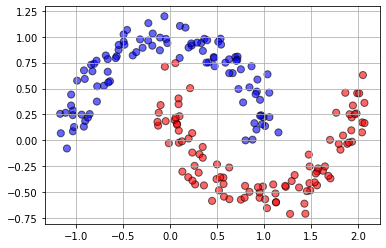

In [ ]:
X,Y = datasets.make_moons(n_samples=200, noise=0.1)

X = np.c_[np.ones(X.shape[0]),X] # add 'ones' column to X
Y = Y[:,None]


print('X.shape =',X.shape)
print('Y.shape =',X.shape)

plt.scatter(X[:,1],X[:,2],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.grid()
plt.show()

In [ ]:
#  your code here...  
#  (use more code cells if needed)

W1 = np.random.randn(3,6)*0.01
W2 = np.random.randn(6,1)*0.01

print('W1.shape =',W1.shape)
print('W2.shape =',W2.shape)


W1.shape = (3, 6)
W2.shape = (6, 1)


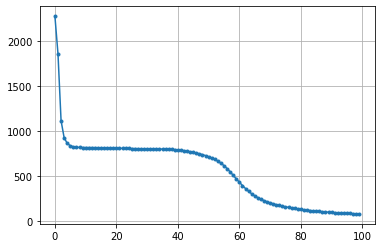

In [ ]:
J, W1, W2 = gradient_descent(X,Y,W1, W2, T=100, alpha=0.22)
plt.plot(J,'.-')
plt.grid()

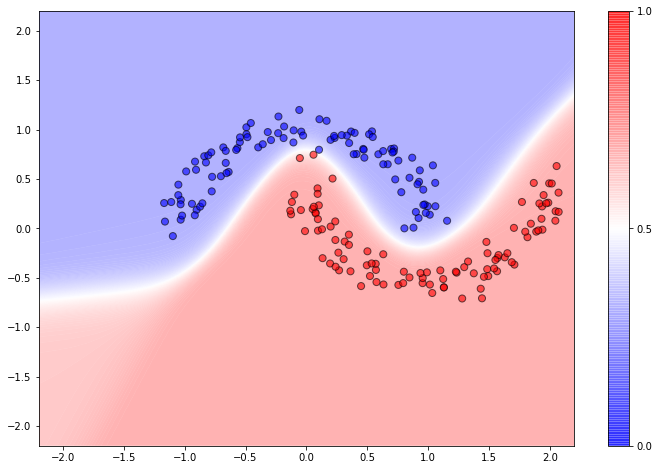

In [ ]:
nn = 100
x1_set = np.linspace(-2.2,2.2,nn)
x2_set = np.linspace(-2.2,2.2,nn)

X1,X2 = np.meshgrid(x1_set,x2_set)
xx = np.c_[np.ones(nn*nn),X1.flatten(),X2.flatten()]

# forward propagation
a0 = xx
z1 = a0.dot(W1)  
a1 = sigmoid(z1)
z2 = a1.dot(W2)
a2 = sigmoid(z2)
yy_hat = a2

G_grid = yy_hat.reshape(nn,nn)

plt.figure(figsize=(12,8))
plt.contourf(x1_set,x2_set,G_grid, 100,alpha=0.3, cmap=plt.cm.bwr,antialiased=True,vmin=0,vmax=1)
plt.scatter(X[:,1],X[:,2],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.colorbar(ticks=[ 0,0.5, 1])
plt.show()

## Good Luck!